# Import Librairies

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np

# Import Dataset

In [3]:
# monter le disque googleDrive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Ecole\ IA\ 4 Bordeaux/Partage\ Etudiants/
# ouvre le fichier
data = pd.read_csv("Billionaires Statistics Dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Ecole IA 4 Bordeaux/Partage Etudiants


# Analyse préliminaire

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [6]:
data.describe(include='all')

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2640,2640,2575.000000,2602,2568,2640,2640,2640,...,2456.000000,2476,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
unique,NaN,NaN,18,2638,NaN,78,741,906,18,77,...,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Finance & Investments,Wang Yanqing & family,NaN,United States,New York,Real estate,Finance & Investments,United States,...,NaN,"$21,427,700,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,372,2,NaN,754,99,151,372,735,...,NaN,754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1289.159091,4623.787879,NaN,NaN,65.140194,NaN,NaN,NaN,NaN,NaN,...,4.364169,NaN,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,NaN,NaN,13.258098,NaN,NaN,NaN,NaN,NaN,...,3.623763,NaN,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,...,-1.900000,NaN,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,...,1.700000,NaN,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,...,2.900000,NaN,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,...,7.500000,NaN,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397


In [5]:
for col in data.columns:
  if data[col].isnull().sum() > 0:
    print(f"{col}  \t\t\t=> {data[col].isnull().sum()} valeurs nulles")

age  			=> 65 valeurs nulles
country  			=> 38 valeurs nulles
city  			=> 72 valeurs nulles
organization  			=> 2315 valeurs nulles
birthDate  			=> 76 valeurs nulles
firstName  			=> 3 valeurs nulles
title  			=> 2301 valeurs nulles
state  			=> 1887 valeurs nulles
residenceStateRegion  			=> 1893 valeurs nulles
birthYear  			=> 76 valeurs nulles
birthMonth  			=> 76 valeurs nulles
birthDay  			=> 76 valeurs nulles
cpi_country  			=> 184 valeurs nulles
cpi_change_country  			=> 184 valeurs nulles
gdp_country  			=> 164 valeurs nulles
gross_tertiary_education_enrollment  			=> 182 valeurs nulles
gross_primary_education_enrollment_country  			=> 181 valeurs nulles
life_expectancy_country  			=> 182 valeurs nulles
tax_revenue_country_country  			=> 183 valeurs nulles
total_tax_rate_country  			=> 182 valeurs nulles
population_country  			=> 164 valeurs nulles
latitude_country  			=> 164 valeurs nulles
longitude_country  			=> 164 valeurs nulles


In [ ]:
"""for a,b in zip(data.age,2023-pd.to_datetime(data.birthDate).dt.year):
  if a != b:
    print("age",a,"  calculated",b)"""

In [8]:
data.shape

(2640, 35)

In [12]:
data.loc[data.age != 2022 - pd.to_datetime(data.birthDate).dt.year, ['age','birthDate']]

,age,birthDate
0,74.0,3/5/1949 0:00
2,59.0,1/12/1964 0:00
6,81.0,2/14/1942 0:00
7,83.0,1/28/1940 0:00
9,67.0,3/24/1956 0:00
...,...,...
2625,53.0,NaN
2629,51.0,1/12/1972 0:00
2630,35.0,3/21/1988 0:00
2631,54.0,1/1/1969 0:00


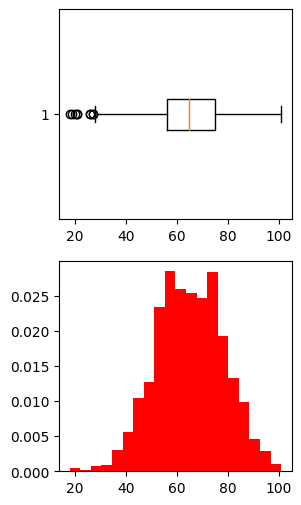

In [35]:
import matplotlib.pyplot as plt


to_plot = data.loc[~data.age.isnull()]
fig, ax = plt.subplots(2,1,figsize=(3,6))


ax[0].boxplot(to_plot.age, vert=False)
#lt.show()

ax[1].hist(to_plot.age, bins=20, density=True, color='red')

plt.show()

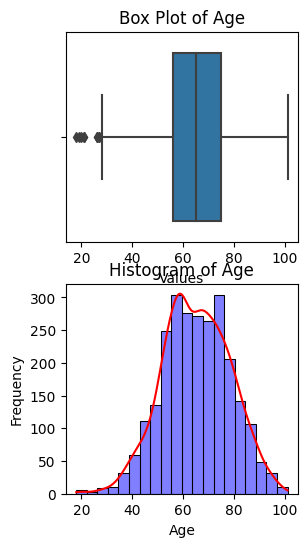

In [38]:
import seaborn as sns

fig, ax = plt.subplots(2,1,figsize=(3,6))
sns.boxplot(x=to_plot.age, orient='h', ax=ax[0])
ax[0].set_title('Box Plot of Age')
ax[0].set_xlabel('Values')

# Histogram on the second subplot (ax[1) with blue bars and a red density curve
sns.histplot(data=to_plot.age, bins=20, kde=True, color='blue', ax=ax[1])
ax[1].set_title('Histogram of Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')

# Change the color of the density curve to red
ax[1].lines[0].set_color('red')

plt.show()

In [50]:
Q1,Q3 = np.quantile(to_plot.age, [0.25,0.75])
IQ = Q3-Q1
flyers = Q1-1.5*IQ
data.loc[data['age'] <= flyers]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
823,818,3500,Fashion & Retail,Clemente Del Vecchio,18.0,Italy,Milan,Eyeglases,Fashion & Retail,Italy,...,0.6,"$2,001,244,392,042",61.9,101.9,82.9,24.3,59.1,6.029740e+07,41.871940,12.567380
824,818,3500,Fashion & Retail,Leonardo Maria Del Vecchio,27.0,Italy,Milan,Eyeglasses,Fashion & Retail,Italy,...,0.6,"$2,001,244,392,042",61.9,101.9,82.9,24.3,59.1,6.029740e+07,41.871940,12.567380
825,818,3500,Fashion & Retail,Luca Del Vecchio,21.0,Italy,Milan,Eyeglasses,Fashion & Retail,Italy,...,0.6,"$2,001,244,392,042",61.9,101.9,82.9,24.3,59.1,6.029740e+07,41.871940,12.567380
1334,1312,2300,Fashion & Retail,Kevin David Lehmann,20.0,NaN,NaN,Drugstores,Fashion & Retail,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,1725,1700,Media & Entertainment,Kim Jung-min,21.0,NaN,NaN,Online gaming,Media & Entertainment,South Korea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,1725,1700,Media & Entertainment,Kim Jung-youn,19.0,NaN,NaN,Online gaming,Media & Entertainment,South Korea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,1905,1500,Diversified,Alexandra Andresen,26.0,Norway,Oslo,Investments,Diversified,Norway,...,2.2,"$403,336,363,636",82.0,100.3,82.8,23.9,36.2,5.347896e+06,60.472024,8.468946
1909,1905,1500,Diversified,Katharina Andresen,27.0,Norway,Oslo,Investments,Diversified,Norway,...,2.2,"$403,336,363,636",82.0,100.3,82.8,23.9,36.2,5.347896e+06,60.472024,8.468946
2113,2020,1400,Metals & Mining,Wang Zelong,26.0,China,Jiaozuo,Chemicals,Metals & Mining,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [75]:
data.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [78]:
data.country.unique()

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Switzerland', 'Belgium', 'Hong Kong',
       'Austria', 'Japan', 'United Kingdom', 'Australia', 'Indonesia',
       'United Arab Emirates', 'Russia', 'Chile', 'Monaco',
       'Czech Republic', 'Sweden', nan, 'Thailand', 'Uzbekistan',
       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',
       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',
       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',
       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',
       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',
       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',
       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',
       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Mo

In [180]:
to_plot['count'].values[0]

1

<ipython-input-195-26ab161361cf>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  to_plot_all = data.groupby('country')['rank','age'].agg(['count','median'])


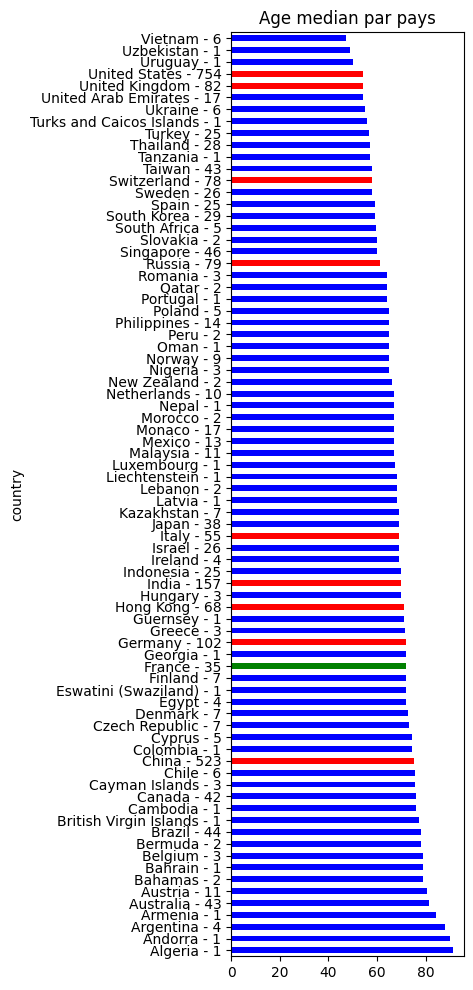

In [195]:
# replace missing age value by the
data.loc[data.age.isnull() & data.birthDate.isnull(),"age"] = data.age.median()

to_plot_all = data.groupby('country')['rank','age'].agg(['count','median'])
to_plot = to_plot_all.age

#colors = ['red' if median_value > threshold else 'blue' for median_value in sorted_data]

colors = ['green' if val == 35 else 'red' if val > 50 else 'blue' for val in to_plot['count'].values]




to_plot['median'].sort_values(ascending=False).plot.barh(title='Age median par pays',
                                                         color=colors,
                                                         figsize=(3,12))
labels_ = [to_plot.index.values[i]+" - "+str(to_plot['count'].values[i]) for i in range(len(to_plot))]
plt.yticks(range(len(to_plot.index)), labels_)

plt.show()

In [141]:
### MAKING A TOP 3 COUNTRY FOR AGES

# oldest age in what country?
data.loc[data.age.max(),'country']
# youngest age in what country?
data.loc[data.age.min(),'country']

# groupby country
age_by_country = data.groupby('country').agg({'rank':'count','age':'mean'}).sort_values(by='age')
# 3 yougest average in what country?
age_by_country[:3]
# oldest average in what country?
age_by_country[-3:]

,rank,age
country,,
Tanzania,1,47.000000
Norway,9,51.111111
Cyprus,5,51.200000


In [49]:
# giving no age the age of the median

array([56., 75.])

<Axes: title={'center': 'Répartition par genre des Milliardaires'}, ylabel='gender'>

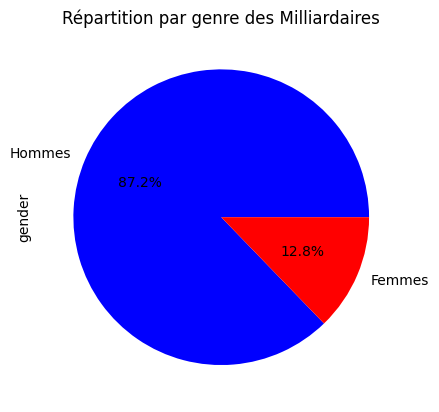

In [ ]:
# comparaison F/H
data.gender.value_counts().plot.pie(autopct='%1.1f%%',
                                    title = 'Répartition par genre des Milliardaires',
                                    labels=['Hommes','Femmes'],
                                    colors=['b','r'])

AttributeError: ignored

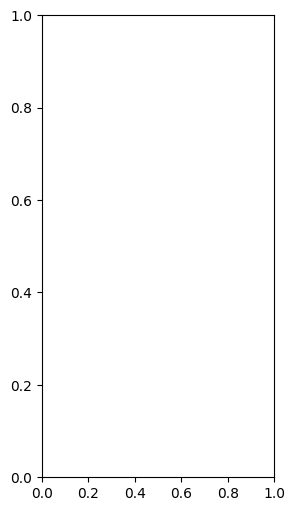

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(3,6))
ax1 = fig.subplot()
ax1.plot.box(data.age)